In [2]:
import mediapipe as mp
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from utils import sclera_segmentation_utils 


import sys
sys.path.append('/home/dasec-notebook/Thesis/sclera-segmentation/src')

import sclera # NOTE: This is the custom module for sclera segmentation taken from https://github.com/wkabbani/sclera-segmentation

%load_ext autoreload
%autoreload 2

2024-11-18 16:02:58.712934: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
image_path_file = "../image_paths/test_images.txt" 
degub_directory = "debug_images"

# Load the image paths
with open(image_path_file, 'r') as f:
    image_paths = f.readlines()


In [1]:

# Generate the face mesh for images in the txt file

mp_face_mesh = mp.solutions.face_mesh


for image_path in image_paths:
    image_path = image_path.strip()
    # print(image_path)

    debug_path = f"{degub_directory}/{image_path.split('/')[-1]}"
    print(debug_path)
    l_locations, r_locations = sclera.get_sclera_location(mp_face_mesh, image_path, debug_path=debug_path)

    if l_locations and r_locations:
        l_values, r_values = sclera.get_sclera_pixels(image_path, l_locations, r_locations)

    print(len(l_values))
    print(len(r_values))




NameError: name 'mp' is not defined

Plot example of one person with a masked image

I0000 00:00:1732202195.768521   24474 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732202195.794515  155957 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) HD Graphics 620 (KBL GT2)
W0000 00:00:1732202195.858595  155952 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732202195.936261  155950 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


mask shape (558, 501, 3)


ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

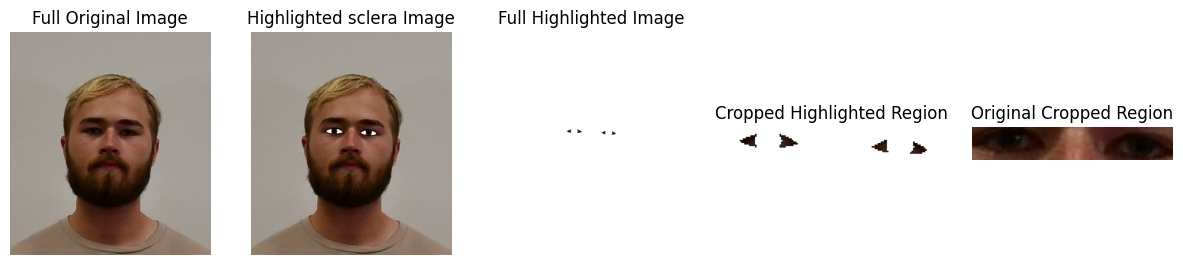

In [7]:
mp_face_mesh = mp.solutions.face_mesh

debug_path = "test_image2.jpg"
image_path = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00067/DSC_0593.JPG"

l_locations, r_locations = sclera.get_sclera_location(mp_face_mesh, image_path, debug_path=debug_path)

if l_locations and r_locations:
    l_values, r_values = sclera.get_sclera_pixels(image_path, l_locations, r_locations)

# print(l_locations)
# print(r_locations)

# print(l_values)
# print(r_values)

# print(l_values.shape)
# print(r_values.shape)

# Plot the segmentation

image = Image.open(image_path)
image = np.array(image)  
mask = np.zeros(image.shape, dtype=bool)

for loc in l_locations + r_locations:
    x, y = loc
    mask[y, x] = True 

print("mask shape", mask.shape)


highlighted_image = image.copy()
highlighted_image[~mask] = 255 # NOTE: This is the color for the mask pixels

# Show the image with the sclera pixels highlighted
# plt.imshow(highlighted_image)
# plt.axis('off')  # Hide axis for better visualization
# plt.show()

# Save the image with the sclera pixels highlighted
highlighted_image = Image.fromarray(highlighted_image)
highlighted_image.save('highlighted_sclera2.jpg')


# Plot a small region of the sclera

sclera_coords = np.column_stack(np.where(mask[..., 0])) 

y_min, x_min = sclera_coords.min(axis=0)
y_max, x_max = sclera_coords.max(axis=0)

# Add a margin to the bounding box
margin = 5  
y_min = max(y_min - margin, 0)
x_min = max(x_min - margin, 0)
y_max = min(y_max + margin, image.shape[0])
x_max = min(x_max + margin, image.shape[1])


if isinstance(highlighted_image, Image.Image):
    highlighted_image = np.array(highlighted_image)

cropped_region = highlighted_image[y_min:y_max, x_min:x_max]
original_cropped_region = image[y_min:y_max, x_min:x_max]

# Save the cropped region
# cropped_region_pil = Image.fromarray(cropped_region)
# cropped_region_pil.save('highlighted_sclera_cropped.jpg')

# Display the images for visualization
plt.figure(figsize=(15, 7))

plt.subplot(1, 5, 1)
plt.title("Full Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("Highlighted sclera Image")
debug_image = Image.open(debug_path)
debug_image = np.array(debug_image)
plt.imshow(debug_image)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title("Full Highlighted Image")
plt.imshow(highlighted_image)
plt.axis('off')


plt.subplot(1, 5, 4)
plt.title("Cropped Highlighted Region")
plt.imshow(cropped_region)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title("Original Cropped Region")
plt.imshow(original_cropped_region)
plt.axis('off')

plt.show()

# Visualize the average sclera color for each person in the xyY color space

Based on the original images

I0000 00:00:1731942548.472518   24474 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731942548.480499   26569 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) HD Graphics 620 (KBL GT2)
W0000 00:00:1731942548.497429   26565 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731942548.574810   26564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731942548.693832   24474 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731942548.700477   26577 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) HD Graphics 620 (KBL GT2)
W0000 00:00:1731942548.730606   26573 inference_feedback_manager.cc:114] Feedback manager re

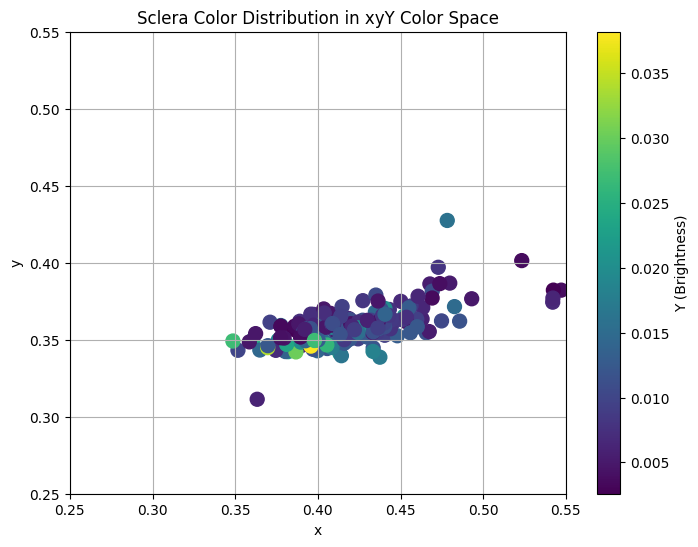

In [6]:


image_paths_txt = "/home/dasec-notebook/Thesis/skin_tone_estimation/image_paths/indoor.txt"
image_paths = open(image_paths_txt, 'r').readlines()

debug_directory = None
person_xyY = []  

for image_path in image_paths:
    image_path = image_path.strip()
    debug_path = f"{debug_directory}/{image_path.split('/')[-1]}"
    
    l_locations, r_locations = sclera.get_sclera_location(mp_face_mesh, image_path, debug_path=debug_path)

    if l_locations and r_locations:
        avg_xyY = sclera_segmentation_utils.get_average_sclera_color(image_path, l_locations, r_locations)
        person_xyY.append(avg_xyY)

person_xyY = np.array(person_xyY)

plt.figure(figsize=(8, 6))
plt.scatter(person_xyY[:, 0], person_xyY[:, 1], c=person_xyY[:, 2], cmap='viridis', s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sclera Color Distribution in xyY Color Space")
plt.colorbar(label='Y (Brightness)')
plt.xlim(0.25, 0.55)  # x-axis limits from 0.25 to 0.55
plt.ylim(0.25, 0.55)  # y-axis limits from 0.25 to 0.55
plt.grid(True)
plt.show()

